# Fundamentos de Aprendizaje Automático y Reconocimiento de Patrones
***
## Introducción a Scikit-learn

### Objetivos

- Familiarizarse con en funcionamiento de la biblioteca Scikit-learn.
- Utilizar la librería para:
    - Clasificar los tipos de iris 
    - Clasificar entre imágenes de gatos y no gatos


## Lista de ejercicios

[Ejercicio 1](#Ejercicio1): Clasificación Iris     
[Ejercicio 2](#Ejercicio2): Clasificación de imágenes 

## Importar bibliotecas

In [1]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (7, 5)  # set default size of plots
%config InlineBackend.figure_format='retina'

## Ejercicio 1: Clasificación Iris
<a id="Ejercicio1"></a>

### Datasets

Scikit-learn cuenta con una API que permite levantar algunos de los conjuntos de datos clásicos de aprendizaje automático. La información detallada se encuentra [acá](https://scikit-learn.org/stable/datasets.html#datasets). 
Además cuenta con funciones para generar datos sintéticos. A continuación cargaremos la base de datos *iris* que es una de las bases que viene junto con *scikit-learn*. Dicha base se encuentra en el módulo *datasets*.

In [2]:
from sklearn.datasets import load_iris

# Carga los datos de iris
data = load_iris()

La información del dataset viene almacenada en un diccionario de Python. Para ver las claves del diccionario se invoca al método *keys()*.

In [13]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Se puede obtener los nombres de las clases, por ejemplo, de dos formas distintas. 

In [4]:
# Preguntando el valor de la clave
print(data["target_names"])

# Directamente mediante data.
print(data.target_names)

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


Las características están almacenadas en la clave *data* y los valores objetivos (en este caso etiquetas) en *target*. En ambos casos son almacenados como arreglos de *numpy*.

In [5]:
# Obtener datos y etiquetas del diccionario
X, y = data.data, data.target

# Se pueden invocar métodos de numpy, por ej shape
print(X.shape, y.shape)

(150, 4) (150,)


Se grafican las dos primeras caracteristicas

Text(0, 0.5, 'sepal width (cm)')

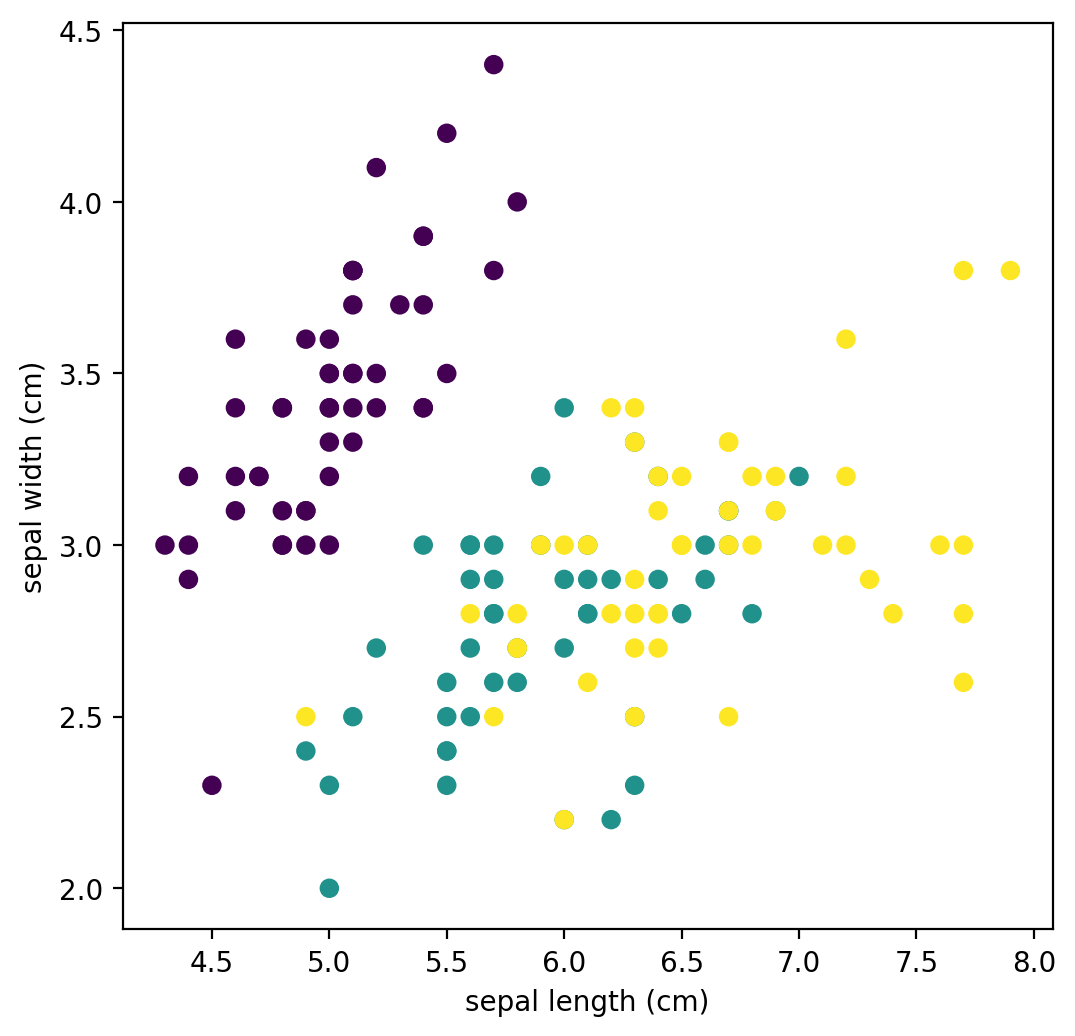

In [6]:
# Se grafica sepal length conta sepal width
plt.figure(figsize=(6,6), dpi =100)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

**Ejercicio:** ¿Es cierto que la muestra en la posición 125 pertence a la clase *virginica*?

In [11]:
#####################################################
####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

print(data.target_names[data.target[125]])

#####################################################
####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

virginica


**Ejercicio:** ¿Cuánto vale el largo del pétalo para dicha muestra?

In [17]:
#####################################################
####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

print(data.feature_names)
print(data.data[125,2])

#####################################################
####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
6.0


### Generación de conjuntos de entrenamiento y test

Para dividir el conjunto de datos en un subconjunto de entrenamiento y uno de validación, es útil el método *train_test_split* del módulo *model_selection*. La siguiente celda divide el conjunto de datos en 75% de entrenamiento y 25% para test.

In [18]:
from sklearn.model_selection import train_test_split

# Separación entre Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Verificación
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


**Ejercicio** Generar una división del conjunto de datos de forma que el 60% sea de entrenamiento y el 40% restante para test.

In [20]:
#####################################################
####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#####################################################
####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

(90, 4) (90,)
(60, 4) (60,)


### Preprocesamiento de los datos

Scikit-learn cuenta con el módulo [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) que tiene una serie de métodos útiles para realizar transformaciones de las características. Algunos de ellos son:  
* Estandarización de los datos
* Normalización de los datos
* Transformación polinómica de características
* Manejo de datos faltantes

In [21]:
# Se importa el módulo que hace la transformación.
from sklearn.preprocessing import StandardScaler

# Se crea una instancia de la transformación.
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

# Primero, se calculan los parametros de estandarización.
scaler.fit(X_train)

StandardScaler()

Una vez encontrados los parámetros de la estandarización se pueden consultar. Observar que los atributos calculados por el estimador, en este caso el *StandardScaler*, se diferencian de los demás atributos porque el nombre termina con guión bajo.

In [22]:
print(scaler.mean_)
print(scaler.scale_)
print(scaler.n_samples_seen_)

[5.83888889 3.09777778 3.65111111 1.15444444]
[0.88489729 0.42504321 1.85898685 0.79849318]
90


La normalización de los datos se realiza con el método `transform()`.

Datos originales: mean = 3.436, std = 2.012
Datos estandarizados: mean = -0.000, std = 1.000


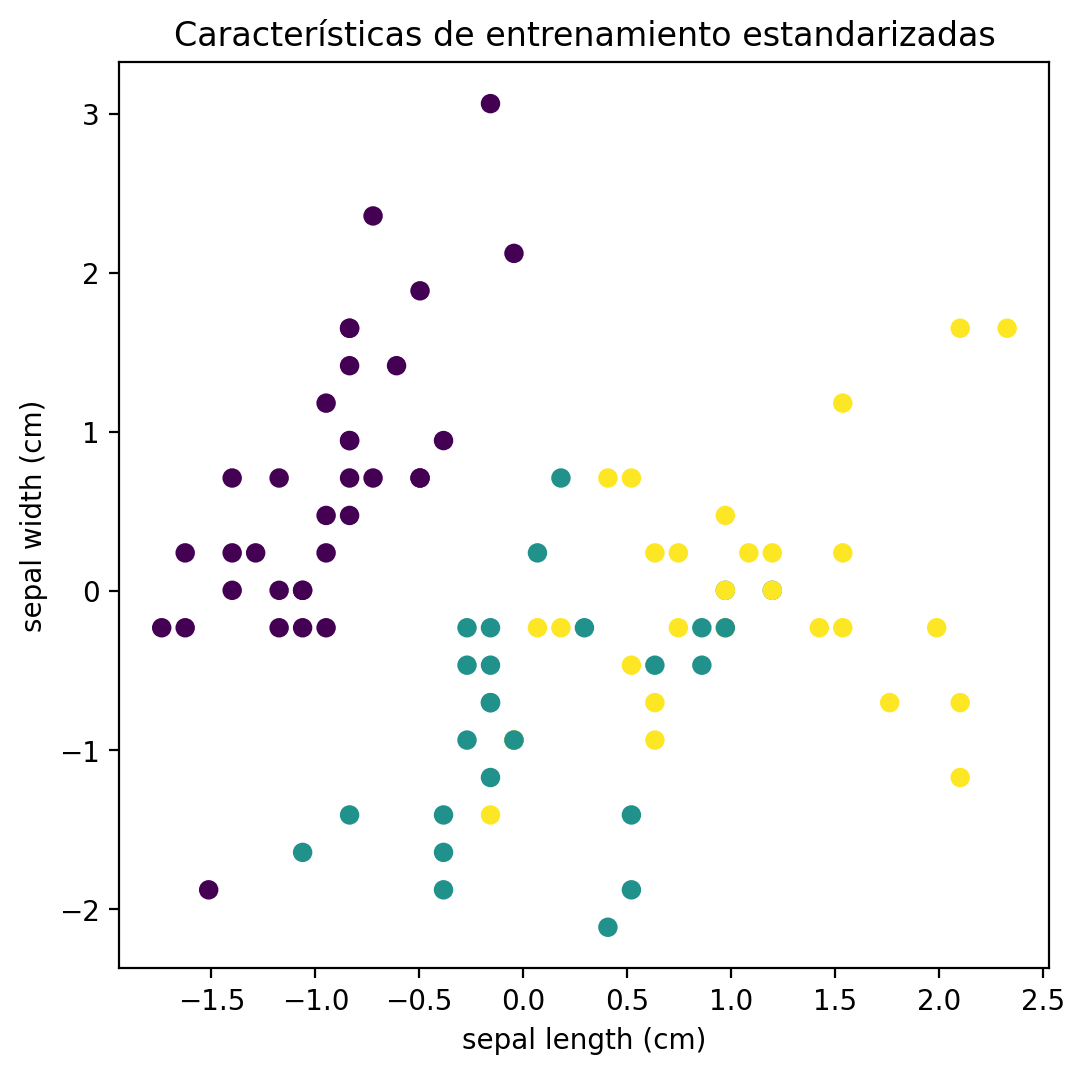

In [23]:
# Se estandarizan los datos de entrenamiento.
X_train_std = scaler.transform(X_train)

# Se estandarizan los datos de test
X_test_std = scaler.transform(X_test)

# Grafico los datos estandarizados
plt.figure(figsize=(6,6), dpi =100)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Características de entrenamiento estandarizadas")

# Verificación
print("Datos originales: mean = %.3f, std = %.3f" % (X_train.mean(), X_train.std()))
print(
    "Datos estandarizados: mean = %.3f, std = %.3f"
    % (X_train_std.mean(), X_train_std.std())
)

**Ejercicio:** Realizar una transformación de las características originales de forma que queden en el rango [-0.5,0.5] utilizando alguna de las funciones del modulo *preprocessing*.

In [ ]:
#####################################################
####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################



#####################################################
####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

# Verificación
print("Datos originales: min = %.3f, max = %.3f" % (X_train.min(), X_train.max()))
print(
    "Datos estandarizados: min = %.3f, max = %.3f"
    % (X_train_scaled.min(), X_train_scaled.max())
)

## Ejercicio 2: Clasificación de imágenes
<a id="Ejercicio2"></a>

Se utilizarán algunos de los clasificadores de scikit-learn para distinguir imágenes de *gatos* de *no gatos*.

### Los datos

La siguiente celda carga los datos. La base cuenta con conjunto de imágenes para entrenamiento y un conjunto para test. En este caso las características a utilizar son directamente los valores de los píxeles de las imágenes. 

In [ ]:
from fuaa_utils import load_cats_dataset

features_train, y_train, features_test, y_test, clases = load_cats_dataset()
print("Se levantaron %d imágenes de entrenamiento" % len(features_train))
print(
    "%d pertenecen a la clase %s y %d a la clase %s"
    % (
        np.sum(y_train == 1), 
        clases[0].decode("utf-8"),
        np.sum(y_train == 0),
        clases[1].decode("utf-8"),
    )
)
print("Se levantaron %d imágenes de test" % len(features_test))
print(
    "%d pertenecen a la clase %s y %d a la clase %s"
    % (
        np.sum(y_test == 1),
        clases[0].decode("utf-8"),
        np.sum(y_test == 0),
        clases[1].decode("utf-8"),
    )
)

print("Las imágenes son de tamaño [%d, %d, %d] " % (features_train.shape[1:]))

Cada vez que se ejecuta la siguiente celda se muestra un ejemplo de cada una de las clases. 

In [ ]:
# Ejemplo de una imagen gato
indices_gatos = [i for i, label in enumerate(y_train) if label]
pos = np.random.randint(len(indices_gatos))
gato = features_train[indices_gatos[pos]]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(gato)
plt.title("Ejemplo de gato")

# Ejemplo de una imagen no gato
indices_no_gatos = [i for i, label in enumerate(y_train) if not label]
pos = np.random.randint(len(indices_no_gatos))
gato = features_train[indices_no_gatos[pos]]
plt.subplot(1, 2, 2)
plt.imshow(features_train[indices_no_gatos[pos]])
plt.title("Ejemplo de no gato")
plt.show()

### Normalización de características

In [ ]:
# Se hace el reshape de las características
feat_train_flat = features_train.reshape(features_train.shape[0], -1)
feat_test_flat = features_test.reshape(features_test.shape[0], -1)

# Se normalizan los datos para que las características queden en el rango [-0.5, 0.5]
feat_train_n = feat_train_flat / 255.0 - 0.5
feat_test_n = feat_test_flat / 255.0 - 0.5

### Regresión lineal

In [ ]:
def mostrar_pesos(W):
    "Función auxiliar que muestra los pesos aprendidos en un modelo lineal"
    plt.figure()
    image = np.reshape(W, (64, 64, 3))
    plt.imshow((image - image.min()) / (image.max() - image.min()))
    plt.imsave("weights.png", (image - image.min()) / (image.max() - image.min()))
    plt.tight_layout()

In [ ]:
from sklearn.linear_model import LinearRegression

# Se define el clasificador
lr = LinearRegression()

# Se encuentran los parámetros
lr.fit(feat_train_n, y_train.flatten())

In [ ]:
# Se los muestran los coeficientes
W_lr = lr.coef_
print(W_lr.shape)
mostrar_pesos(W_lr)

### Regresión lineal mediante descenso por gradiente

In [ ]:
from sklearn.linear_model import SGDClassifier

# Se define el clasificador
sgd = SGDClassifier()
# Se encuentran los parámetros
sgd.fit(feat_train_n, y_train.flatten())

In [ ]:
# Se los muestran los coeficientes
W_sgd = sgd.coef_
print(W_sgd.shape)
mostrar_pesos(W_sgd)

### Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Se define el clasificador
log_clf = LogisticRegression(solver="sag", max_iter=10000)
# Se encuentran los parámetros
log_clf.fit(feat_train_n, y_train.flatten())

In [ ]:
# Se muestran los parámetros aprendidos
W_log = log_clf.coef_
mostrar_pesos(W_log)

In [ ]:
# Se predicen los valores de las muestras de entrenamiento y test
y_pred_train = log_clf.predict(feat_train_n)
y_pred_test = log_clf.predict(feat_test_n)
# Se calcula el desempeño para los conjuntos de entrenamiento y test
print(
    "Accuracy con conjunto de entrenamiento: %f"
    % log_clf.score(feat_train_n, y_train.flatten())
)
print("Accuracy con conjunto de test: %f" % log_clf.score(feat_test_n, y_test))

### Red neuronal de dos capas

In [ ]:
from sklearn.neural_network import MLPClassifier

# Se define una red similar a la del práctico
mlp = MLPClassifier(
    hidden_layer_sizes=(7,),
    activation="relu",
    max_iter=10000,
    alpha=0,
    solver="sgd",
    verbose=10,
    tol=1e-4,
    random_state=43,
    learning_rate_init=0.001,
)

mlp.fit(feat_train_n, y_train.flatten())

### Medidas de desempeño

En el módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) scikit-learn tiene implementadas varias medidas de desempeño. Tres de las mas utilizadas son: *accuracy*, *precision* y *recall* 

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

y_train_pred = mlp.predict(feat_train_n)
y_test_pred = mlp.predict(feat_test_n)

print(
    "Accuracy con conjunto de entrenamiento: %f" % accuracy_score(y_train, y_train_pred)
)
print("Accuracy con conjunto de test: %f" % accuracy_score(y_test, y_test_pred))

In [ ]:
# Precision = TP/(TP+FP)
from sklearn.metrics import precision_score

print(
    "Precision con conjunto de entrenamiento: %f"
    % precision_score(y_train, y_train_pred)
)
print("Precision con conjunto de test: %f" % precision_score(y_test, y_test_pred))

In [ ]:
# Recall = TP/(TP+FN)
from sklearn.metrics import recall_score

print(
    "Recall con conjunto de entrenamiento: %f"
    % recall_score(y_train, y_train_pred)
)
print("Recall con conjunto de test: %f" % recall_score(y_test, y_test_pred))

### Ejercicio 

Mejorar el desempeño, en términos de *accuracy*, tanto de la **red neuronal de dos capas** como del clasificador que utiliza **regresión logística**. Algunas de las modificaciones que se pueden evaluar son las siguientes:
- Modificación del *learning rate*
- Regularización mediante *weight decay*
- Regularización mediante *early stopping*
- En el caso de la red neuronal, además:
    - Modificación del número de nodos en capa oculta de la red
    - Función de *activación* utilizada
    - Inicialización

In [ ]:
# ...